In [53]:
import json
from collections import defaultdict

import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import pandas as pd
import seaborn as sns

rc = {'axes.facecolor':'white',
      'axes.grid' : False,
      'axes.spines.bottom': False,
      'axes.spines.left': False,
      'axes.spines.right': False,
      'axes.spines.top': False,
      'savefig.transparent': False}
plt.rcParams.update(rc)

In [13]:
plt.rcParams.keys()

KeysView(RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': False,
          'axes.grid.axis': 'both',
          'axes.gri

In [2]:
DATA_PATH = '../../data/processed/data.json'
VISUALIZATION_FOLDER = '../../visualizations/geographical_tags/'

In [3]:
with open(DATA_PATH, 'r', encoding='utf-8') as f:
    data = json.load(f)

In [5]:
flattened = {'recipe': [], 'geo_tag': []}

for recipe in data:
    for geo_tag in data[recipe]['geographical_tags']:
        flattened['recipe'].append(recipe)
        flattened['geo_tag'].append(geo_tag)

df_flattened = pd.DataFrame(flattened)

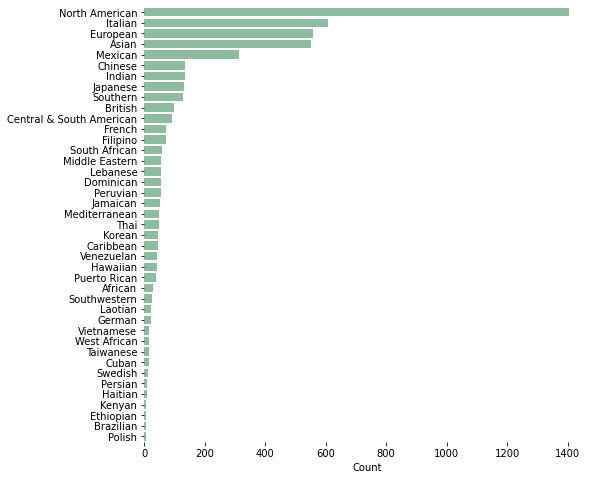

In [73]:
plt.figure(figsize=(8, 8))
sns.countplot(y='geo_tag', data=df_flattened, order=df_flattened['geo_tag'].value_counts().index, color='#86c29f')
plt.xlabel('Count')
plt.ylabel('')
plt.savefig(VISUALIZATION_FOLDER + 'geo_tags.png', dpi=300, bbox_inches='tight')
plt.show()


In [22]:
geo_tags = set()
amount_each = defaultdict(lambda: 0)

for val in data.values():
    for geo_tag in val['geographical_tags']:
        geo_tags.add(geo_tag)
        amount_each[geo_tag] += 1

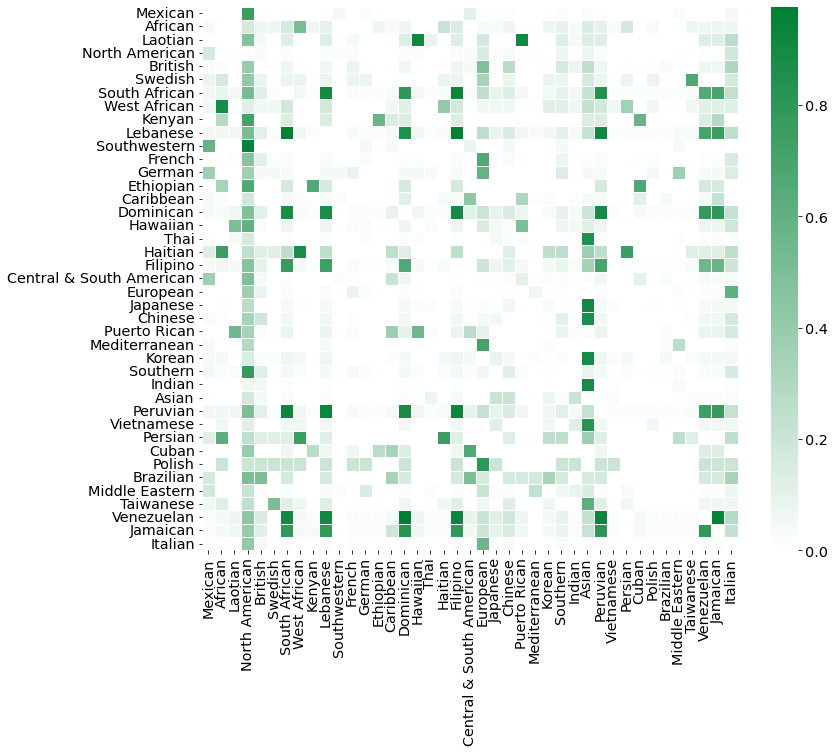

In [56]:
label_matrix = pd.DataFrame(0.0, index=list(geo_tags), columns=list(geo_tags))


for recipe, val in data.items():
    for tag in val['geographical_tags']:
        for other_tag in val['geographical_tags']:
            if tag == other_tag:
                continue
            label_matrix.at[tag, other_tag] += 1 / amount_each[tag] 


plt.figure(figsize=(12, 10))
#cmap_ = sns.color_palette("light:green", as_cmap=True)
cmap_colors = [(1, 1, 1), (0, 0.5, 0.2)] 
cmap_ = LinearSegmentedColormap.from_list('white_to_green', cmap_colors, N=256)
heatmap = sns.heatmap(label_matrix, annot=False, linewidths=.5, cmap=cmap_)
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize='x-large')
plt.xticks(fontsize='x-large')
plt.yticks(fontsize='x-large')
plt.savefig(VISUALIZATION_FOLDER + "tag_cooccurrence.png", dpi=300, bbox_inches='tight')
plt.show()

In [57]:
len(geo_tags)

41